# Results Analysis
In this section, a few charts analysing the results of process done o predict.py

## Chosing best algorithm and number of features on BoW

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
results = pd.read_csv('data/results.csv', sep=';')
results.head()
results.count()

DT               144
RF               144
SGD              144
desc_features    144
kw_features      144
name_features    144
dtype: int64

In [63]:
results.sort_values(['DT'], ascending=False).filter(['kw_features','name_features','desc_features','DT']).head()

,kw_features,name_features,desc_features,DT
90,100,2000,1500,0.671251
13,50,1500,0,0.670213
17,50,2000,0,0.668915
56,0,1000,1000,0.668915
143,150,2500,2500,0.668656


In [64]:
results.sort_values(['RF'], ascending=False).filter(['kw_features','name_features','desc_features','RF']).head()

,kw_features,name_features,desc_features,RF
134,100,1500,2500,0.728075
56,0,1000,1000,0.726518
46,100,2500,500,0.726258
114,100,2000,2000,0.725221
62,100,1500,1000,0.724702


In [65]:
results.sort_values(['SGD'], ascending=False).filter(['kw_features','name_features','desc_features','SGD']).head()

,kw_features,name_features,desc_features,SGD
0,0,0,0,0.71588
1,50,0,0,0.71588
92,0,2500,1500,0.71588
93,50,2500,1500,0.71588
94,100,2500,1500,0.71588


### Keyword Features X Algorithms

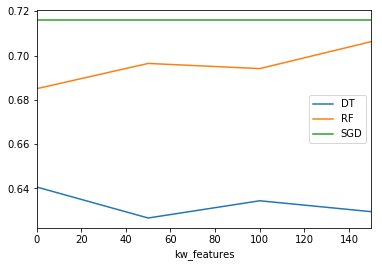

In [66]:
kw_results = results.loc[results['desc_features'] == 0].loc[results['name_features'] == 0]
kw_results = kw_results.filter(['DT','RF', 'SGD', 'kw_features'])
kw_results.plot(x='kw_features')
plt.figure()

### Name Features X Algorithms

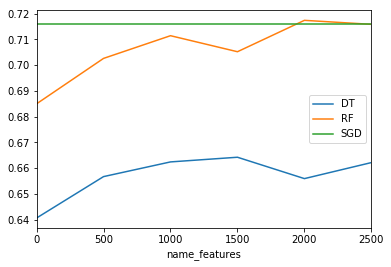

In [67]:
kw_results = results.loc[results['desc_features'] == 0].loc[results['kw_features'] == 0]
kw_results = kw_results.filter(['DT','RF', 'SGD', 'name_features'])
kw_results.plot(x='name_features')
plt.figure()

### Desc Features X Algorithms

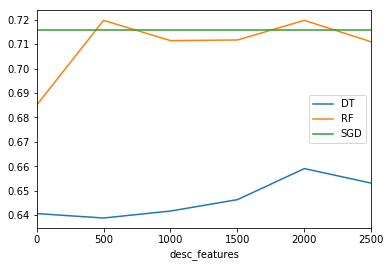

In [68]:
kw_results = results.loc[results['name_features'] == 0].loc[results['kw_features'] == 0]
kw_results = kw_results.filter(['DT','RF', 'SGD', 'desc_features'])
kw_results.plot(x='desc_features')
plt.figure()

## Algorithm Refinement
This section explores the results of the run on predict_refinement.py that perfoms uses GridSearchCV to find out best parameters for Random Forest Classifier algorithm that was chosen for this problem based on the results above.

In [126]:
results_ref = pd.read_csv('data/results_refinement.csv', sep=';')
results_ref

,criterion,n_estimators,score,std
0,gini,10,0.714731,0.002425
1,gini,50,0.721395,0.001257
2,gini,100,0.722775,0.001043
3,gini,200,0.723198,0.001240
4,gini,500,0.723512,0.001019
5,gini,1000,0.723430,0.001547
6,entropy,10,0.715495,0.002676
7,entropy,50,0.722979,0.001525
8,entropy,100,0.723553,0.001298
9,entropy,200,0.723894,0.002309


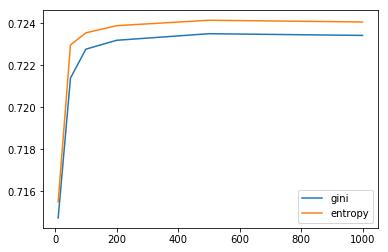

In [162]:
gini = results_ref[results_ref['criterion']=='gini']
entropy = results_ref[results_ref['criterion']=='entropy']
plt.plot(gini['n_estimators'], gini['score'], label='gini')
plt.plot(entropy['n_estimators'], entropy['score'], label='entropy')
plt.legend()
plt.figure()
#help(plt.plot)